# MINE - Mutual Information Neural Estimation (https://arxiv.org/pdf/1801.04062.pdf)

This paper hypothesizes that the Mutual Information between two random variables can be estimated  via gradient descend over neural networks.
Given two random variables X and Z, the KL divegence between the joint distribution $\mathbb{P}_{XZ}$ and the product of the marginals $\mathbb{P}_{X}\otimes\mathbb{P}_{Z}$ gives a lower bound two the real value of $I(X;Z)$.

There are two formulations to estimate $I(X;Z)$.

## Donsker-Varadhan representation

$$\widehat{I(X;Z)} = \sup_{\theta \in \Theta} \mathbb{E}_{\mathbb{P}_{XZ}}[T_{\theta}] - \text{log}(\mathbb{E}_{\mathbb{P}_{X}\otimes\mathbb{P}_{Z}}[e^{T_{\theta}}])$$

## f-Divergence representation

$$\widehat{I(X;Z)} = \sup_{\theta \in \Theta} \mathbb{E}_{\mathbb{P}_{XZ}}[T_{\theta}] - (\mathbb{E}_{\mathbb{P}_{X}\otimes\mathbb{P}_{Z}})[e^{T_{\theta}-1}]$$


Bellow we show how to estimate $I(X;Z)$ using both methods and compare with the numerical estimated $I(X;Z)$,


In [1]:
import numpy as np
import tensorflow as tf
from mine import MineModel
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt


# Defining two random variables
N = 20000
d = 1
EPOCHS = 200


X = np.sign(np.random.normal(0.,1.,[N, d]))
Z = X + np.random.normal(0.,np.sqrt(0.2),[N, d])



# Numerical Estimation


In [2]:
mi_numerical = mutual_info_regression(X.reshape(-1, 1), Z.ravel())[0]
print("Numerical Estimator")
print(mi_numerical)

Numerical Estimator
0.6587183936096429


# Estimation with MINE

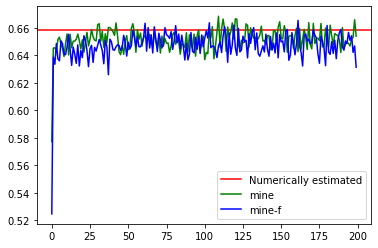

In [3]:
def compute_mine(MINE_F):

    model = MineModel(is_mine_f=MINE_F)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
    callback = model.fit(
        x=[X, Z], epochs=EPOCHS, verbose=0, batch_size=100
    )

    return -np.array(callback.history["loss"])/d

mine = compute_mine(False)
mine_f = compute_mine(True)

plt.Figure()
plt.axhline(mi_numerical, label="Numerically estimated", color="red")
plt.plot(list(range(EPOCHS)), mine, label="mine", color="green")
plt.plot(list(range(EPOCHS)), mine_f, label="mine-f", color="blue")
plt.legend()
plt.show()

